This notebook contains some plots inside the paper, but is based on the plots I used for the Ellogon presentation.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

# set paletter with custom colors
# colors = ["windows blue", "pumpkin orange", "greyish"]
# sns.set_palette(sns.xkcd_palette(colors))

In [2]:
# sns.set_palette("colorblind")
sns.set_style("ticks")

In [3]:
mpl.rcParams['axes.titlesize'] = 15

In [4]:
def make_plot(data, dataset, legend_loc):
    
    
    hue_col = 'Model'
    g = sns.catplot(x='Method', y='Accuracy',hue=hue_col, data=data,
            height=6, aspect=9/6, kind="bar",legend=False, hue_order=["ResNet-18 w/o rotations", "ResNet-18 w/ rotations", "E2-ResNet-18"])
   
    #add legend to plot
    plt.legend(loc=legend_loc,title=hue_col, fontsize="large", title_fontsize="large", framealpha=1.) 
    plt.xlabel("")
    plt.ylim([80,100])
    plt.title(f"Test accuracy for random initialization and finetuning on {dataset}")
    for p in g.ax.patches:
#         p.set_width(0.2)
        g.ax.text(p.get_x() + p.get_width()/2., p.get_height(), str(p.get_height()), 
        fontsize=12, ha='center', va='bottom')
    os.makedirs("plots", exist_ok=True)
    plt.savefig(f"plots/acc_rand_fine_{dataset.lower()}.jpg",dpi=500, bbox_inches = 'tight')
    plt.show()

In [5]:
pcam_results={"Method": ["Random init", "Random init", "Finetuning", "Finetuning", "Finetuning"], 
              "Model": ["ResNet-18 w/ rotations", "E2-ResNet-18", "ResNet-18 w/o rotations", "ResNet-18 w/ rotations", "E2-ResNet-18"], 
              "Accuracy": [87.44, 90.15, 86.68, 86.27, 89.63]}
pcam_results = pd.DataFrame(pcam_results)
pcam_results

,Method,Model,Accuracy
0,Random init,ResNet-18 w/ rotations,87.44
1,Random init,E2-ResNet-18,90.15
2,Finetuning,ResNet-18 w/o rotations,86.68
3,Finetuning,ResNet-18 w/ rotations,86.27
4,Finetuning,E2-ResNet-18,89.63


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


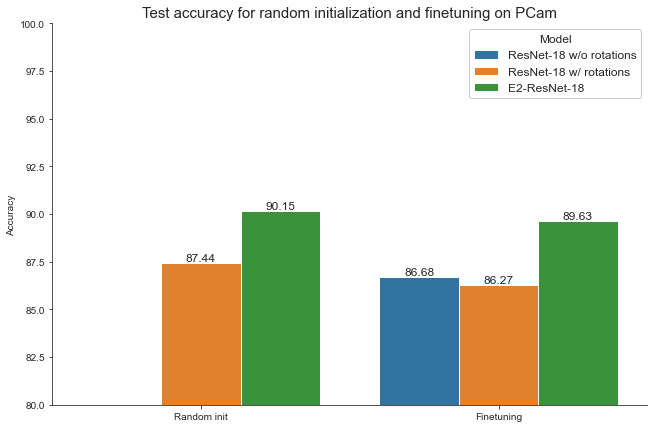

In [6]:
make_plot(pcam_results, "PCam", "upper right")

In [6]:
breakhis_results={"Method": ["Random init", "Random init", "Finetuning", "Finetuning", "Finetuning"], 
              "Model": ["ResNet-18 w/ rotations", "E2-ResNet-18", "ResNet-18 w/o rotations", "ResNet-18 w/ rotations", "E2-ResNet-18"], 
              "Accuracy": [97.09, 97.47, 98.65, 98.60, 97.97]}
breakhis_results = pd.DataFrame(breakhis_results)
breakhis_results

,Method,Model,Accuracy
0,Random init,ResNet-18 w/ rotations,97.09
1,Random init,E2-ResNet-18,97.47
2,Finetuning,ResNet-18 w/o rotations,98.65
3,Finetuning,ResNet-18 w/ rotations,98.60
4,Finetuning,E2-ResNet-18,97.97


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


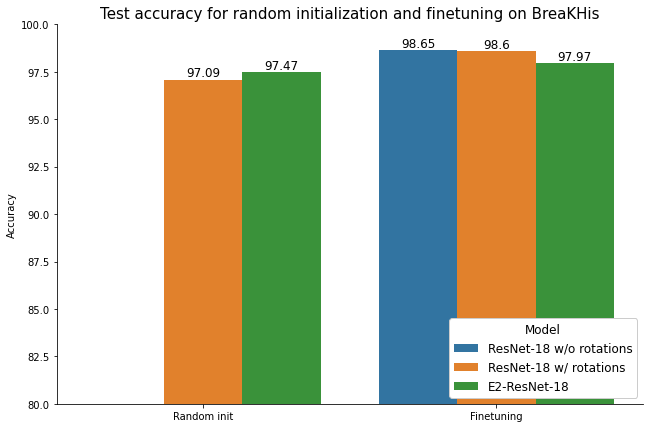

In [7]:
make_plot(breakhis_results, "BreaKHis", "lower right")

## Linear evaluation

In [8]:
import json

def plot_linear_eval(runs, dataset, ylim):
    train_acc = {}
    valid_acc = {}
    for run in runs:
        metrics= {"train": [], "valid": []}
        with open(run["run_file"]+".json") as json_file:
            phase_metrics = list(json_file)
            for train_phase_idx in range(0, len(phase_metrics), 2):
                epoch = int(train_phase_idx / 2)
                valid_phase_idx = train_phase_idx + 1

                train_epoch_acc = json.loads(phase_metrics[train_phase_idx])["train_accuracy_list_meter"]["top_1"]["0"]
                valid_epoch_acc = json.loads(phase_metrics[valid_phase_idx])["test_accuracy_list_meter"]["top_1"]["0"]
                metrics["train"].append(train_epoch_acc)
                metrics["valid"].append(valid_epoch_acc)
            train_acc[run["label"]] = metrics["train"]
            valid_acc[run["label"]] = metrics["valid"]
    
    
    # train acc
    train_acc = pd.DataFrame(train_acc)
    mpl.rcParams['figure.figsize'] = 12,8

    sns.lineplot(data=train_acc, dashes=False)
    plt.ylim((ylim[0], ylim[1]))
    plt.title(f"Train accuracy over epochs for {dataset}")
    colors = sns.color_palette()

    plt.legend(title='Models', fontsize="large", title_fontsize="large", framealpha=1.)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")

    plt.savefig(f"plots/train_accs_{dataset.lower()}.jpg",dpi=500, bbox_inches = 'tight')
    plt.show()


    # validation and test acc
    valid_acc = pd.DataFrame(valid_acc)
    g = sns.lineplot(data=valid_acc, dashes=False)
    plt.ylim((ylim[2], ylim[3]))
    plt.title(f"Validation accuracy over epochs and final test accuracy for {dataset}")
    colors = sns.color_palette()

    for i, run in enumerate(runs):
        plt.scatter(run["best_valid_epoch"], valid_acc[run["label"]].values[run["best_valid_epoch"]], 
                    marker='v', s=50, label=f"Best validation accuracy {run['label']}", color=colors[i])
        plt.scatter(run["best_valid_epoch"], run["test_acc"], marker='o', s=50, label=f"Test accuracy {run['label']}", color=colors[i])

    plt.legend(title='Models', fontsize="large", title_fontsize="large", framealpha=1.)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")

    plt.savefig(f"plots/val_test_accs_{dataset.lower()}.jpg",dpi=500, bbox_inches = 'tight')

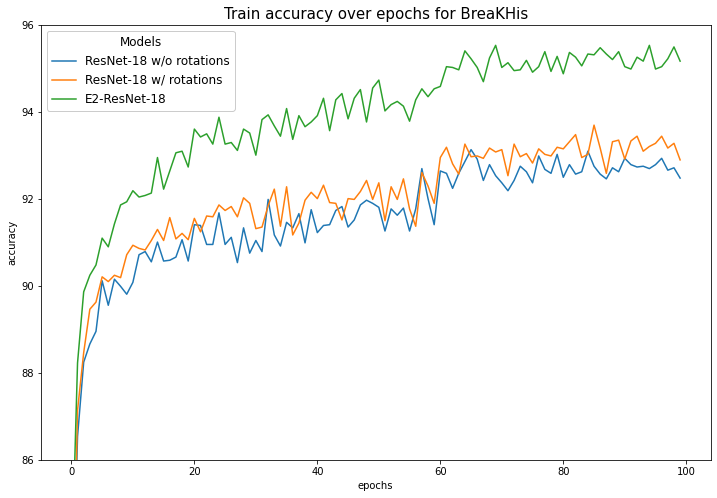

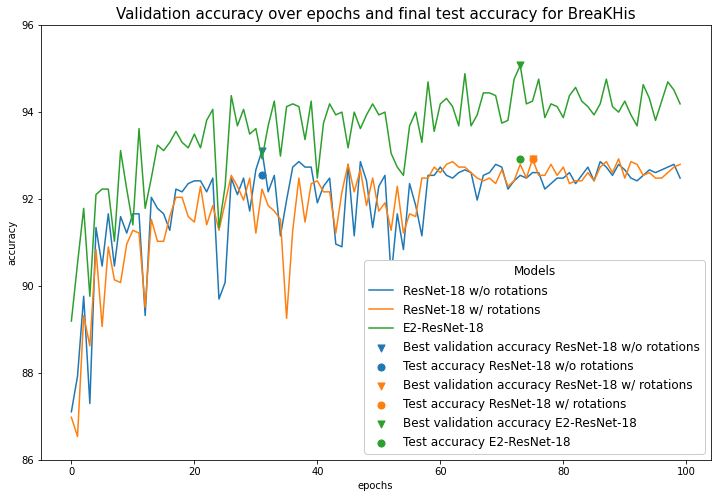

In [9]:
runs = [{"run_file":"metrics/metrics_14635_seed_7",
         "best_valid_epoch": 31,
         "test_acc":92.54,
         "label":"ResNet-18 w/o rotations"},
        {"run_file":"metrics/metrics_14630_seed_7",
         "best_valid_epoch": 75,
         "test_acc":92.92,
         "label":"ResNet-18 w/ rotations"},
        {"run_file":"metrics/metrics_14681_seed_7",
         "best_valid_epoch": 73,
         "test_acc":92.92,
         "label":"E2-ResNet-18"}]
dataset= "BreaKHis"

plot_linear_eval(runs, "BreaKHis", ylim=[86, 96, 86, 96])

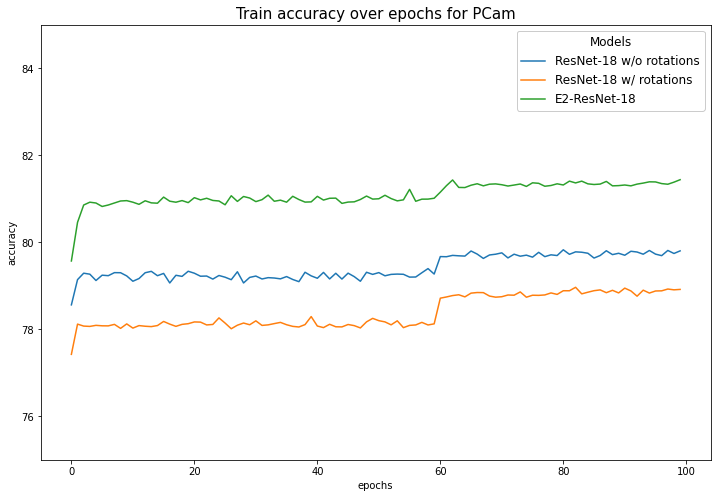

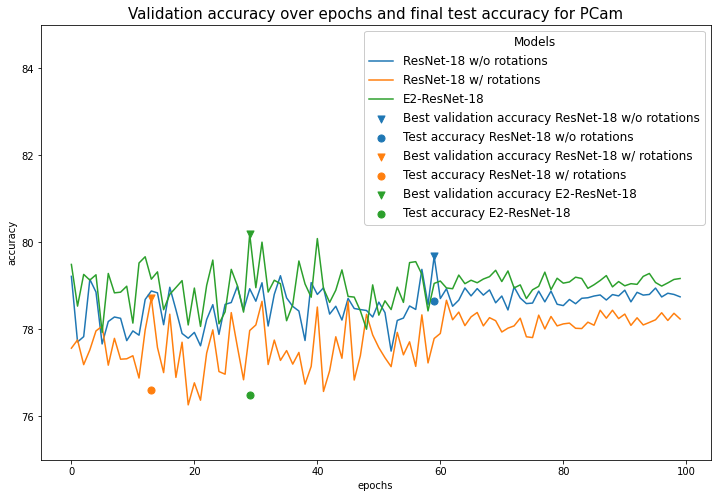

In [11]:
runs = [{"run_file":"metrics/metrics_14762_seed_7",
         "best_valid_epoch": 59,
         "test_acc":78.65,
         "label":"ResNet-18 w/o rotations"},
        {"run_file":"metrics/metrics_14688_seed_7",
         "best_valid_epoch": 13,
         "test_acc":76.61,
         "label":"ResNet-18 w/ rotations"},
        {"run_file":"metrics/metrics_14739_seed_7",
         "best_valid_epoch": 29,
         "test_acc":76.49,
         "label":"E2-ResNet-18"}]
dataset= "PCam"

plot_linear_eval(runs, "PCam", ylim=[75, 85, 75, 85])

## Linear summary

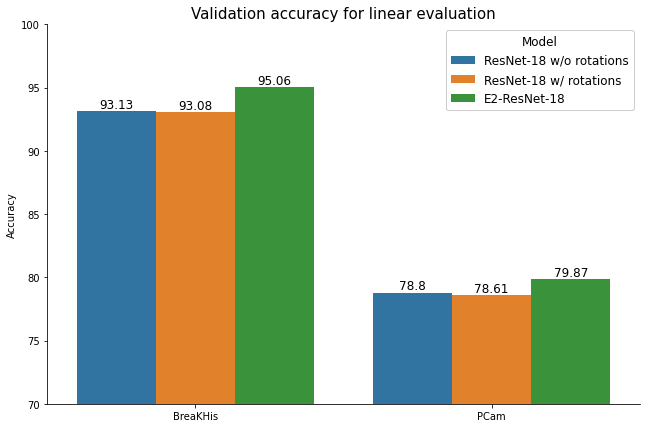

In [12]:
val_results={"Dataset": ["BreaKHis", "BreaKHis", "BreaKHis", 
                     "PCam", "PCam", "PCam"], 
              "Model": ["ResNet-18 w/o rotations", "ResNet-18 w/ rotations", "E2-ResNet-18",
                        "ResNet-18 w/o rotations", "ResNet-18 w/ rotations", "E2-ResNet-18"], 
              "Accuracy": [93.13, 93.08, 95.06,
                          78.8, 78.61, 79.87]}
test_results={"Dataset": ["BreaKHis", "BreaKHis", "BreaKHis", 
                     "PCam", "PCam", "PCam"], 
              "Model": ["ResNet-18 w/o rotations", "ResNet-18 w/ rotations", "E2-ResNet-18",
                        "ResNet-18 w/o rotations", "ResNet-18 w/ rotations", "E2-ResNet-18"], 
              "Accuracy": [92.54, 93.17, 92.92,
                          77.81, 77.1, 76.41]}
data = pd.DataFrame(val_results)
 
hue_col = 'Model'
g = sns.catplot(x='Dataset', y='Accuracy',hue=hue_col, data=data,
        height=6, aspect=9/6, kind="bar",legend=False, hue_order=["ResNet-18 w/o rotations", "ResNet-18 w/ rotations", "E2-ResNet-18"])

#add legend to plot
plt.legend(title=hue_col, fontsize="large", title_fontsize="large", framealpha=1.) 
plt.xlabel("")
plt.ylim([70, 100])
plt.title(f"Validation accuracy for linear evaluation")
for p in g.ax.patches:
#         p.set_width(0.2)
    g.ax.text(p.get_x() + p.get_width()/2., p.get_height(), str(p.get_height()), 
    fontsize=12, ha='center', va='bottom')
os.makedirs("plots", exist_ok=True)
plt.savefig(f"plots/acc_linear_val.jpg",dpi=500, bbox_inches = 'tight')
plt.show()

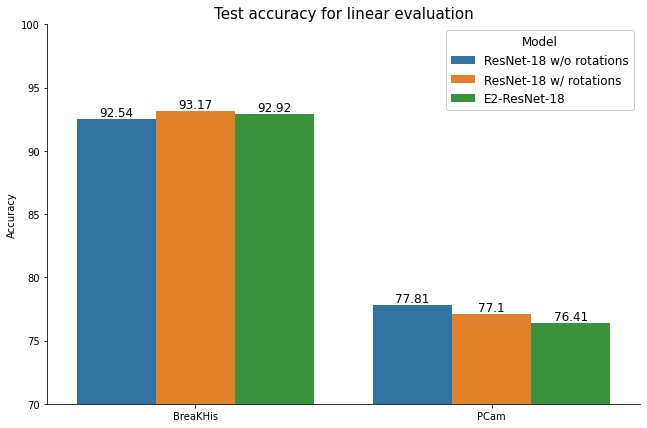

In [13]:
data = pd.DataFrame(test_results)
 
hue_col = 'Model'
g = sns.catplot(x='Dataset', y='Accuracy',hue=hue_col, data=data,
        height=6, aspect=9/6, kind="bar",legend=False, hue_order=["ResNet-18 w/o rotations", "ResNet-18 w/ rotations", "E2-ResNet-18"])

#add legend to plot
plt.legend(title=hue_col, fontsize="large", title_fontsize="large", framealpha=1.) 
plt.xlabel("")
plt.ylim([70, 100])
plt.title(f"Test accuracy for linear evaluation")
for p in g.ax.patches:
#         p.set_width(0.2)
    g.ax.text(p.get_x() + p.get_width()/2., p.get_height(), str(p.get_height()), 
    fontsize=12, ha='center', va='bottom')
os.makedirs("plots", exist_ok=True)
plt.savefig(f"plots/acc_linear_test.jpg",dpi=500, bbox_inches = 'tight')
plt.show()

## Downsampled pretraining results

In [14]:

downsampled_results={"Dataset": ["BreaKHis", "BreaKHis", "PCam", "PCam"], 
              "Model": ["ResNet-18 w/ rotations", "E2-ResNet-18", "ResNet-18 w/ rotations", "E2-ResNet-18"], 
              "Accuracy": [81.24, 83.43, 67.70, 70.34]}
downsampled_results = pd.DataFrame(downsampled_results)
downsampled_results

,Dataset,Model,Accuracy
0,BreaKHis,ResNet-18 w/ rotations,81.24
1,BreaKHis,E2-ResNet-18,83.43
2,PCam,ResNet-18 w/ rotations,67.70
3,PCam,E2-ResNet-18,70.34


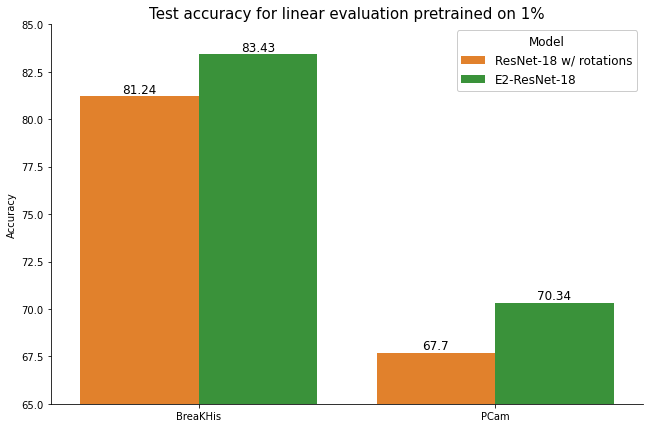

In [15]:
data = downsampled_results

colors = sns.color_palette()
sns.set_palette(colors[1:])
hue_col = 'Model'
g = sns.catplot(x='Dataset', y='Accuracy',hue=hue_col, data=data,
        height=6, aspect=9/6, kind="bar",legend=False, hue_order=["ResNet-18 w/ rotations", "E2-ResNet-18"])

#add legend to plot
plt.legend(title=hue_col, fontsize="large", title_fontsize="large", framealpha=1.) 
plt.xlabel("")
plt.ylim([65,85])
plt.title(f"Test accuracy for linear evaluation pretrained on 1%")
for p in g.ax.patches:
#         p.set_width(0.2)
    g.ax.text(p.get_x() + p.get_width()/2., p.get_height(), str(p.get_height()), 
    fontsize=12, ha='center', va='bottom')
os.makedirs("plots", exist_ok=True)
plt.savefig(f"plots/acc_linear_1perc.jpg",dpi=500, bbox_inches = 'tight')
plt.show()